In [1]:
!nvidia-smi

Sat Sep  2 07:28:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

:Let's do the other type of transfer learning the fine tuning

## Importing the Helper function from the github

In [2]:
!wget https://raw.githubusercontent.com/sameer-kharel/Dl-helper-functions/main/Helper_function.py

--2023-09-02 07:28:28--  https://raw.githubusercontent.com/sameer-kharel/Dl-helper-functions/main/Helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10236 (10.0K) [text/plain]
Saving to: ‘Helper_function.py’

Helper_function.py  100%[===================>]  10.00K  --.-KB/s    in 0s      

2023-09-02 07:28:28 (89.1 MB/s) - ‘Helper_function.py’ saved [10236/10236]



In [3]:
from Helper_function import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
# get the 10% of the training data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-09-02 07:28:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   197MB/s    in 0.8s    

2023-09-02 07:28:33 (197 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
# Check how many imaegs and subdirectories are in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [7]:
# Create the training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [9]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
# See a example of a batch of a data

for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[207.        198.        183.       ]
   [206.64285   197.64285   182.64285  ]
   [208.07652   198.86224   184.5051   ]
   ...
   [186.71942   175.14795   161.57648  ]
   [182.5714    170.5714    156.5714   ]
   [180.9439    168.9439    154.9439   ]]

  [[208.92857   199.92857   184.92857  ]
   [209.85715   200.85715   185.85715  ]
   [207.78572   198.57143   184.21428  ]
   ...
   [191.37247   182.37247   167.37247  ]
   [191.56633   179.56633   163.56633  ]
   [191.83167   179.83167   163.83167  ]]

  [[210.21428   201.        186.64285  ]
   [210.        200.78572   186.42857  ]
   [208.83163   198.83163   186.83163  ]
   ...
   [166.73982   157.83165   140.78574  ]
   [167.        158.21428   140.7857   ]
   [169.9286    158.78575   142.14288  ]]

  ...

  [[206.56123   201.56123   198.56123  ]
   [204.74492   199.74492   196.74492  ]
   [206.11227   201.11227   198.11227  ]
   ...
   [188.42853   174.42853   161.42853  ]
   [188.41322   174.41322   161.41322  ]
   [1

## MOdel 0 : Building a transfer learning feature extraction model using the keras Functional API

The sequential API is straight-forward it runs our layers in the sequential order

But the Functional API gives us the more flexibility with our models : https://www.tensorflow.org/guide/keras/functional_api

In [13]:
# Create the base model with the tf.keras.applications

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freze the base model ( so the underlying pre-trainied patterns aren't updated during training)
base_model.trainable = False

# 3. Create the input into iur model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input layer")

# 4. if using a model like ResNet50V2 you will need to normalize the inputs (you don't have to do for EfficientNEt(s))
# x = tf.keras.layers.experimental.preprocessing.Rescalling(1./255) (inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing the inputs through the base model : {x.shape}")


# 6. Average poo; the outputs of the base model ( aggregate all the most important information and reduce the number of computatons)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D : {x.shape}")

# 7 create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. combine the inputs with the outputs into the model
model_0 = tf.keras.Model(inputs, outputs)

# 9. compile the model

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_feature_extraction")])

16705208/16705208 [==============================] - 0s 0us/step


Shape after passing the inputs through the base model : (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D : (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230902-072842
Epoch 1/5
24/24 [==============================] - 31s 349ms/step - loss: 1.8861 - accuracy: 0.3893 - val_loss: 1.2770 - val_accuracy: 0.7599
Epoch 2/5
24/24 [==============================] - 8s 280ms/step - loss: 1.1224 - accuracy: 0.7613 - val_loss: 0.8751 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 7s 264ms/step - loss: 0.7982 - accuracy: 0.8333 - val_loss: 0.6909 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 9s 314ms/step - loss: 0.6462 - accuracy: 0.8653 - val_loss: 0.6126 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 5s 193ms/step - loss: 0.5513 - accuracy: 0.8760 - val_loss: 0.5793 - val_accuracy: 0.8405


In [14]:
 # evaluate in the full test data
 model_0.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 0.5632 - accuracy: 0.8600


[0.5632454752922058, 0.8600000143051147]

In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [16]:
# Check the layersin our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [17]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

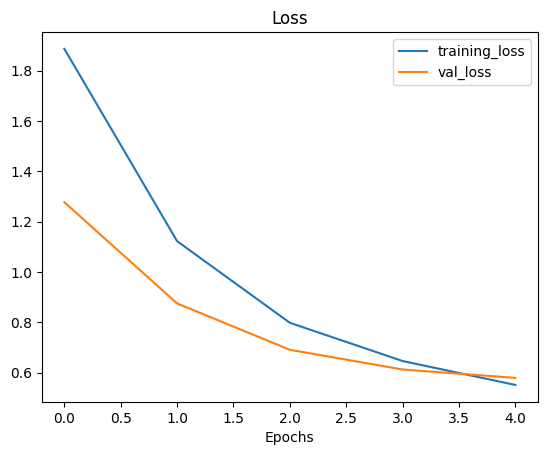

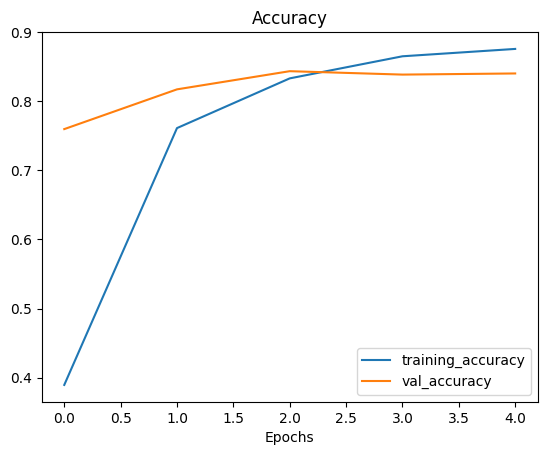

In [18]:
# Check the model training curves
plot_loss_curves(history_0)

## GEtting a feature vector from a trained model

Let's demonstrate the global average ppplin g2d layer...

 we have a tensor after our model goes through `base_model` of the shape ( None, 7, 7, 1280)
 But then when it passes through the GlovalAVeragePOoling2D, it turns into the ( NOne, 1280).

 Let's use use a similar shaped tesnor of the ( 1, 4, 4, 3) and then it pass to the GlobalAveragePooling2D

In [19]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(1)
input_tensor = tf.random.normal(input_shape)
print(f"Random inpput tensor : \n {input_tensor}")

# Pass the random tensor through a global average pooling 2d layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2d global average pooled random tensor : \n {global_average_pooled_tensor}")

# Check the shpae of the different tensors
print(f"shape of input tensor : {input_tensor.shape}")
print(f"Shape of Global Average poled 2D tensor : { global_average_pooled_tensor.shape}")

Random inpput tensor : 
 [[[[-1.1012203   1.5457517   0.383644  ]
   [-0.87965786 -1.2246722  -0.9811211 ]
   [ 0.08780783 -0.20326038 -0.5581562 ]
   [-0.7205441  -0.6259924  -0.71502596]]

  [[-0.34835446 -0.33646983  0.18257578]
   [ 1.1085953   1.2796588  -0.02147583]
   [-0.31968883  0.37332553  0.25279108]
   [ 0.6437664   2.1463082  -0.8251497 ]]

  [[-0.9041368   1.3948787   1.2248751 ]
   [ 0.05864959 -0.49213138 -0.81997806]
   [-0.18526012 -0.39277685 -0.6585226 ]
   [-0.9833388   0.38883775 -1.0372449 ]]

  [[-1.5600569  -0.15791254 -0.3566943 ]
   [-0.2004403   1.613107    0.6796728 ]
   [ 0.08133233  1.3380764   1.1848053 ]
   [-0.35381562 -0.10400175 -0.75114644]]]]
2d global average pooled random tensor : 
 [[-0.34852266  0.4089204  -0.17600945]]
shape of input tensor : (1, 4, 4, 3)
Shape of Global Average poled 2D tensor : (1, 3)


In [20]:
# Let;oso replicate teh GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.34852266,  0.4089204 , -0.17600945]], dtype=float32)>

## Runnning a series of transder learning experiments

we have seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with the 1 % of the training data and how about we set up a bunch of experiments to find out :

1. `model_` - use the feature extraction transfer learning with the 1% of the training data with the data augmentation
2. `model_2` - use the feature extraction tranosfer learning withe hte 10% of the training data with the data augmentation
3. `model_3` - use the fine tuning transfer learning on the 10% of the training data with the data augmentation
4. `model_4` - use the fine-tuning transfer learning on the 100% of the training data with the data augemtation

**NOte** : Throughout all the experiments the same test dataset will be used to evaluate the model this ensures the consistency across the evaluation metrics.


### Getting and preprocessing the data for the model 1


In [21]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-09-02 07:29:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   100MB/s    in 1.3s    

2023-09-02 07:29:57 (100 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
unzip_data("10_food_classes_1_percent.zip")

In [23]:
# Create the training and test dir
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [24]:

# How many images we are working with

walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [25]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding the data augmentation right into the model

To add the data augmentation right into our models we can use the layers inside :

* tf.keras.layers.expermetatl.preprocessing()


data augmentatio : https://www.tensorflow.org/tutorials/images/data_augmentation


The benifit of using the data augmentation inside the moel are:

* Preprocessing of images ( augmenting them ) happens on the GPU which is must faster rather than the cpu
* Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create the data augmentation stage with horizontal flipping, rotations, zoom etc

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"), # Make it () for other accident project
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) keep for the models like ResNet50V2 but the EfficientNEtB() have the rescalling built in
    ], name="data_augmentaion")


## Visualize our data augmentaion layet ( and see what happens to our data )

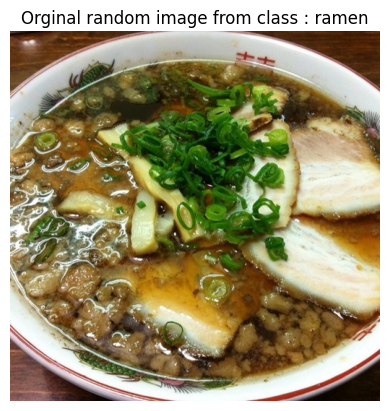

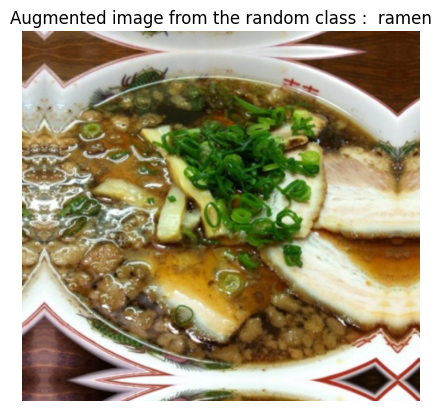

In [27]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Orginal random image from class : {target_class}")
plt.axis(False);

# Now let plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented image from the random class :  {target_class}")
plt.axis(False);

## MOdel 1 : Feature extraction transfer learning on the 1% of the data with the data augmentation

In [28]:
# Setup the input shaepe and base model, freeziang the base model layers

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create tha input layera
inputs = layers.Input(shape=input_shape, name="input_layer")

# ADD in the data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs ( after augmentaions) and don't train it
x = base_model(x, training=False)

# Pool the outputs feature of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the ouput
outputs = layers.Dense(10, activation="softmax", name="outout_layer")(x)

# Make a model using tha inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the modle
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 *len(test_data)),
                        # track the model training loss
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 experiment_name="1_percent_data_augmented")]
                        )

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20230902-073005
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3362 - accuracy: 0.1429 - val_loss: 2.2165 - val_accuracy: 0.1497
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0682 - accuracy: 0.3143 - val_loss: 2.0871 - val_accuracy: 0.2434
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.8884 - accuracy: 0.5000 - val_loss: 1.9789 - val_accuracy: 0.3421
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.6856 - accuracy: 0.6571 - val_loss: 1.8674 - val_accuracy: 0.4309
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.5504 - accuracy: 0.6857 - val_loss: 1.7783 - val_accuracy: 0.4803


In [29]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  (None, None, None, 3)    0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 outout_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [30]:
# Wvaluate on the full test dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 81ms/step - loss: 1.7821 - accuracy: 0.4892


[1.7821356058120728, 0.48919999599456787]

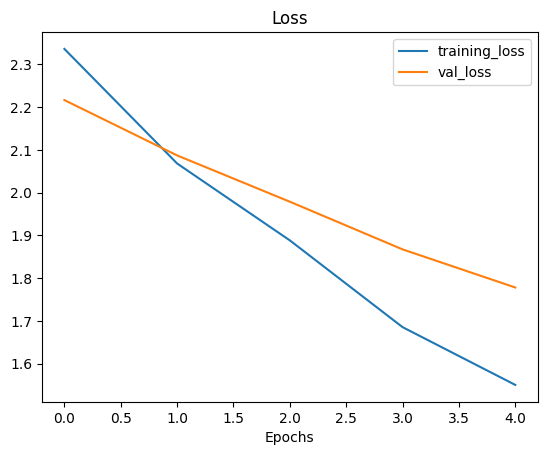

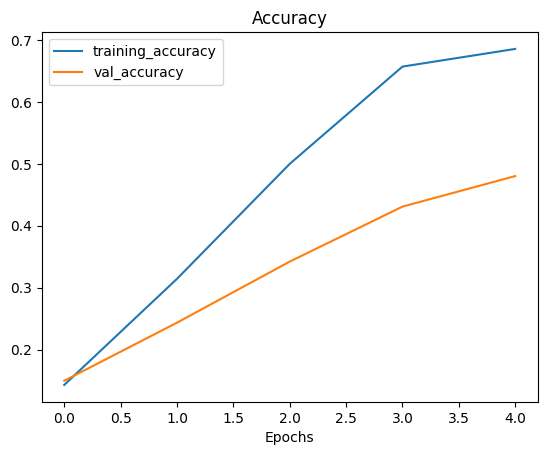

In [31]:
# HOw do the model with t1% of the data augmentation loss curves looks like?
plot_loss_curves(history_1)

# MOdle 2 : Feature extraction transfer learning model with the 10% of the data and the data aaugmentation

In [32]:
# Get the data
train_dir_10_percnet = "10_food_classes_10_percent/train"
test_data = "10_food_classes_10_percent/test"

In [33]:
# How many images
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [34]:
# Set the data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percnet,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
# Create the model 2 with the data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# BUild data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    # preproceiing.Rescallint(1/255.) use this if you are using the model like Resnet50v2 the efficientNEtB0 comes in with the rescalling features built in
    ], name="data_augmentation")

In [36]:
# Let's create the model


# set up the input shape to our model
input_shape = (224, 224, 3)

# Create the frozen base model ( also called the backbone) ( the tesla use the same model resnet50 as  the base model)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs  ( including the layers in the between)

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # Pass augmented images to the base model but
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)


# compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# # Fit the model
# history_2 = model_2.fit(train_data_10_percent,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_10_percent),
#                         validation_data=test_data,
#                         validation_steps=int(0.2 * len(test_data)),
#                         )

### Creating a MOdelCheckpoint Callback

The ModelCheckpoint callback intermediately saves our model ( the full model or just the weights) during training. This is useful so we can come and start where we left off

In [37]:
# Set checkpoint path

checkpoint_path = "ten_percent_model_Checkpoints_weights/checkppoint.ckpt"

# Create a ModelCheckpoint Callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint (filepath=checkpoint_path,
                                                          save_weights_only=True,
                                                          save_best_only=False,
                                                          save_freq="epoch",
                                                          verbose=1)

## Fit the model 2 passing the modelcheckpoint callback

In [38]:
# Let's fit the model saving the checkpoints every epoch

# Fit the model
history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.2 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_data_aug"),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230902-073052
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0378 - accuracy: 0.3453
Epoch 1: saving model to ten_percent_model_Checkpoints_weights/checkppoint.ckpt
24/24 [==============================] - 24s 684ms/step - loss: 2.0378 - accuracy: 0.3453 - val_loss: 1.4736 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3325 - accuracy: 0.6960
Epoch 2: saving model to ten_percent_model_Checkpoints_weights/checkppoint.ckpt
24/24 [==============================] - 12s 476ms/step - loss: 1.3325 - accuracy: 0.6960 - val_loss: 0.9999 - val_accuracy: 0.8042
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0250 - accuracy: 0.7653
Epoch 3: saving model to ten_percent_model_Checkpoints_weights/checkppoint.ckpt
24/24 [==============================] - 13s 541ms/step - loss: 1.0250 - accuracy: 0.7653 - val_loss: 0.7852 - val_accuracy: 0.825

In [39]:
# Model 0 results
model_0.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.5632 - accuracy: 0.8600


[0.5632453560829163, 0.8600000143051147]

In [40]:
# Check the model_2 results on all the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 76ms/step - loss: 0.6037 - accuracy: 0.8532


[0.603659451007843, 0.8532000184059143]

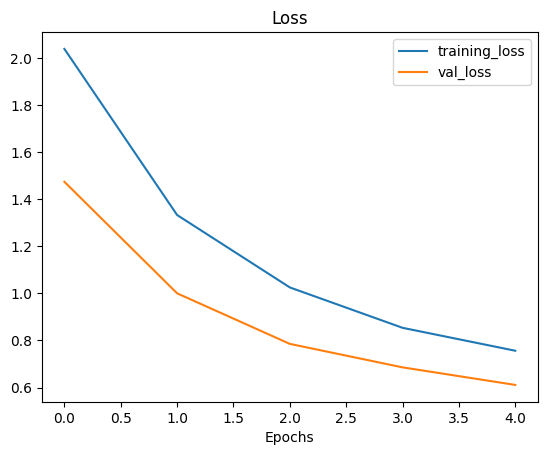

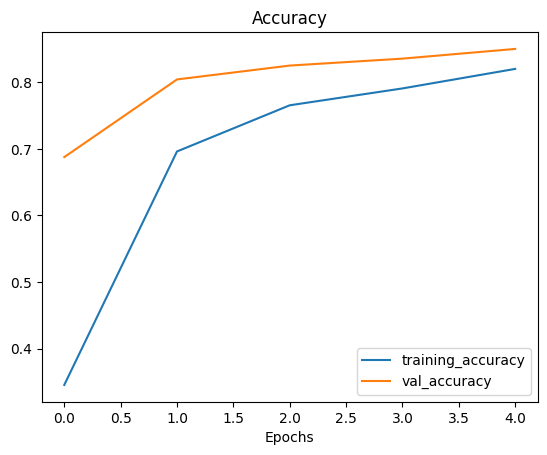

In [41]:
# Plot model loss curves
plot_loss_curves(history_2)

### Loading in Chekpointed weights

Loading in the checkpointed weights returns a model to a specific checkpoint


In [42]:
# Load in the saved model weights and  evaluate the modl

model_2.load_weights(checkpoint_path)

In [43]:
# Evaluate the model_2 with the loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6037 - accuracy: 0.8532


In [44]:
results_10_percent_data_aug == loaded_weights_model_results

False

### Model 3 : Fine tuning an existing model on the 10 % of the data

Note : Fine_tuning usually works best aftet training a feature extraction model for a few epochs and with large amounts of custom data.

In [45]:
# Layers in loaded  model
model_2.layers

In [46]:
# Are these layers trainable
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7836d66ef6a0> True
<keras.engine.sequential.Sequential object at 0x7836d5462fb0> True
<keras.engine.functional.Functional object at 0x7836d5265690> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7836d6e3e230> True
<keras.layers.core.dense.Dense object at 0x7836d5265810> True


In [47]:
# what layers are in our base model(Efficient net B0) and are they trainable?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [48]:
# How many trainable variable are in our base model

print(len(model_2.layers[2].trainable_variables))

0


In [49]:
# To begin the fine tuning, let's start by setting the last 10 layers of our base_model.trainable = True

base_model.trainable = True

# Freeze all layers except  for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model ( we have to recompile the model every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by 10x*
                metrics=["accuracy"])

**NOte** : when using the fine tuning it is the best practice to lower your learning rate by some amount how much? This is a hyperparameter you can tune .But the good rule of thumb is at least 10x (though the different sources will claim the others values)

A good resource for this is ULMFIT paper. : https://arxiv.org/abs/1801.06146

In [50]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [51]:
# Now we have unforzen some of the layers closer to the top, how many trainable variables are there?
print(len(model_2.trainable_variables))

12


In [52]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [53]:
# Fine tune for another 5 epochs
# make the epochs 5 + 5 = 10
initial_epochs = 5

# Refit the model ( same as modle 2 except with more trainable layers)
history_3 = model_2.fit(train_data_10_percent,
                        epochs=10,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_1.epoch[-1], # start training from the previous last epochs,
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230902-073258
Epoch 5/10
24/24 [==============================] - 25s 584ms/step - loss: 0.6363 - accuracy: 0.8213 - val_loss: 0.4901 - val_accuracy: 0.8520
Epoch 6/10
24/24 [==============================] - 13s 534ms/step - loss: 0.5054 - accuracy: 0.8667 - val_loss: 0.4312 - val_accuracy: 0.8618
Epoch 7/10
24/24 [==============================] - 14s 544ms/step - loss: 0.4304 - accuracy: 0.8800 - val_loss: 0.4268 - val_accuracy: 0.8618
Epoch 8/10
24/24 [==============================] - 15s 617ms/step - loss: 0.3945 - accuracy: 0.8867 - val_loss: 0.4420 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 11s 447ms/step - loss: 0.3744 - accuracy: 0.8867 - val_loss: 0.4497 - val_accuracy: 0.8602
Epoch 10/10
24/24 [==============================] - 13s 486ms/step - loss: 0.3432 - accuracy: 0.9000 - val_loss: 0.4534 - val_accuracy: 0.8503


In [54]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 102ms/step - loss: 0.4121 - accuracy: 0.8676


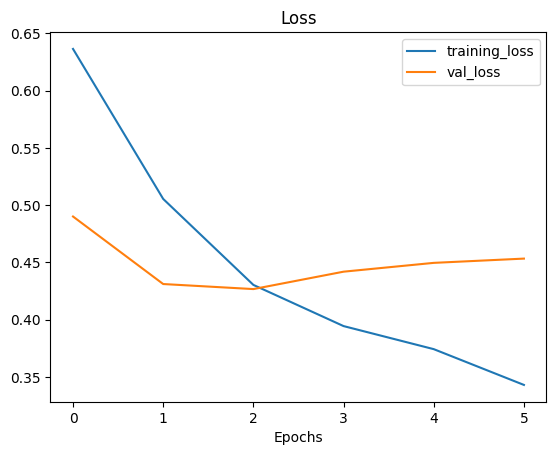

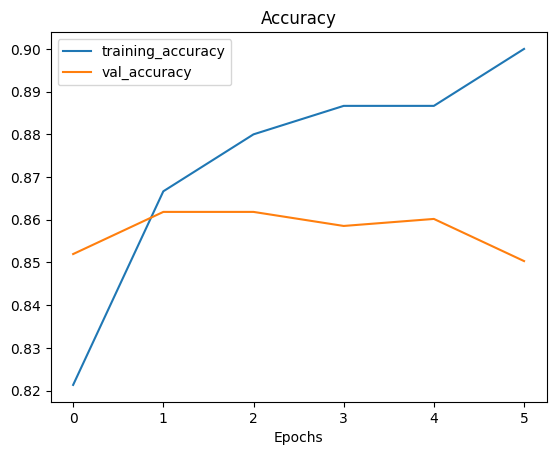

In [55]:
# Check out the loss curves of our fine tune model
plot_loss_curves(history_3)

The `plot_loss_curves` function works great with model which have only been fit once, however we want something to compare one series of running `fit()` with another ( Eg: before and after fine tuning.)

In [56]:
# Let's create a function to compare the training history
def compare_history(original_history, new_history, initial_epochs=5):
  """
  compares two tensorflow history objects
  """
  # Get the original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine the original history metrics with the new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="val accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation accuracy")

    # Make plots for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_acc, label="Training loss")
  plt.plot(total_val_acc, label="val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation loss")


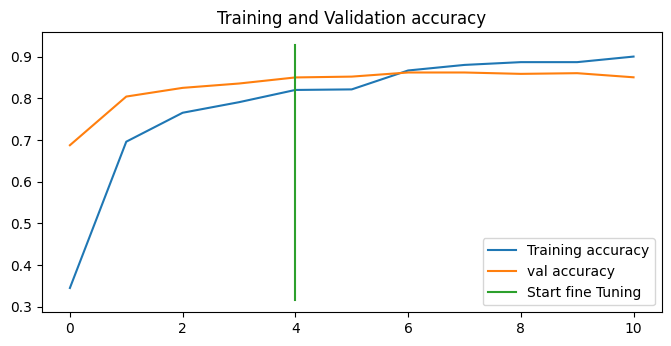

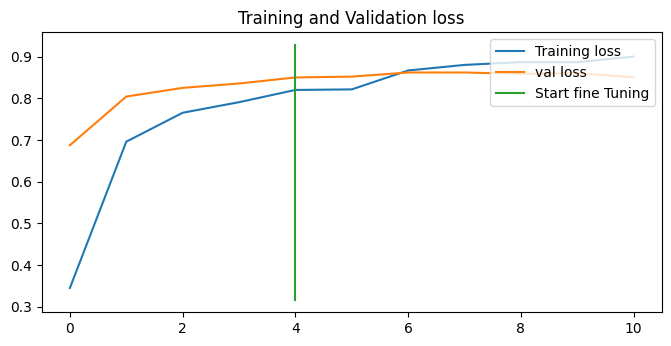

In [57]:
compare_history(history_0,
                history_3,
                initial_epochs=5)

## MOdel 4 : Fine tuning aand existing model on all of the data

In [58]:
# Download and unzip the data
# Now we are using all the images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-09-02 07:34:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  48.6MB/s    in 7.4s    

2023-09-02 07:34:52 (66.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [59]:
unzip_data("10_food_classes_all_data.zip")

In [62]:
# Setting the training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [61]:
# HOw many images we are working
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [65]:
# Setup the data
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_Classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test dataset we have loaded in is the same as what we have been using for the previous experiments ( all the experiments have used the same test dataset)

In [66]:
# Evaluate the model 2 ( this the fine-tuned on 10 percent of the data version)
model_2.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.4121 - accuracy: 0.8676


[0.412051260471344, 0.8676000237464905]

In [67]:
results_fine_tune_10_percent

[0.4120512306690216, 0.8676000237464905]

same results hehe

To train a fine-tuning model ( model 4 ) we need to revert the model_2 back to its feature extraction weights


In [70]:
# Load weights form the checkpoint, that way we can fine tune from
# the same stage teh 10 percent data model was fined-tuned from
model_2.load_weights(checkpoint_path)


ValueError: ignored

In [75]:

# Load previously checkpointed weights
model_1.load_weights(checkpoint_path)

Alright, the previous steps might seem quite confusing but all we've done is:

Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation (model_2) and we saved the model's weights using ModelCheckpoint callback.
Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen (model_3).
Saved the results and training logs each time.
Reloaded the model from step 1 to do the same steps as step 2 except this time we're going to use all of the data (model_4).

In [77]:

# Check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [78]:

# Let's drill into our base_model (efficientnetb0) and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [80]:
# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use "optimizer" instead of "optimizers"
                metrics=["accuracy"])


In [82]:
# continue to train and fine-tune the model to our data ( 100% of training example)
initial_epoch =5
fine_tune_epochs = initial_epoch + 5

In [83]:
history_fine_10_classes_full = model_2.fit(train_data_10_Classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_2.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230902-083442


Epoch 5/10
235/235 [==============================] - 83s 311ms/step - loss: 0.6481 - accuracy: 0.7887 - val_loss: 0.3454 - val_accuracy: 0.8734
Epoch 6/10
235/235 [==============================] - 59s 249ms/step - loss: 0.5193 - accuracy: 0.8352 - val_loss: 0.3235 - val_accuracy: 0.8849
Epoch 7/10
235/235 [==============================] - 54s 228ms/step - loss: 0.4695 - accuracy: 0.8477 - val_loss: 0.2839 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 49s 207ms/step - loss: 0.4225 - accuracy: 0.8655 - val_loss: 0.2712 - val_accuracy: 0.9112
Epoch 9/10
235/235 [==============================] - 46s 195ms/step - loss: 0.3823 - accuracy: 0.8765 - val_loss: 0.2538 - val_accuracy: 0.9145
Epoch 10/10
235/235 [==============================] - 46s 193ms/step - loss: 0.3681 - accuracy: 0.8803 - val_loss: 0.2550 - val_accuracy: 0.9079


In [84]:
 # let's evaluate on the all the test_Data
 results_fine_tune_full_data = model_2.evaluate(test_data
                                                )

79/79 [==============================] - 8s 89ms/step - loss: 0.2570 - accuracy: 0.9176


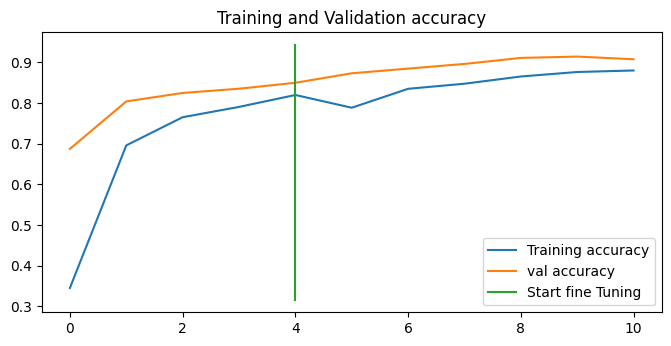

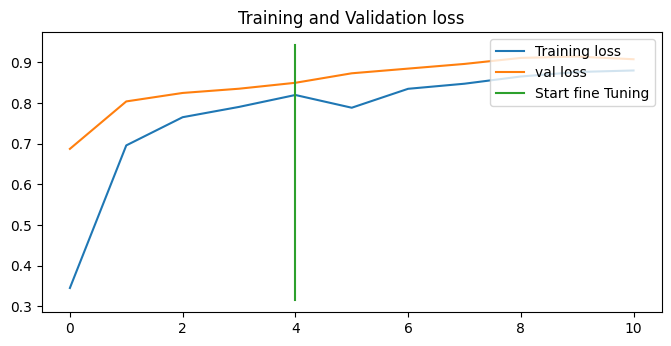

In [91]:
# How did fine-tuning go with the more data?
compare_history(original_history=history_2,
                new_history=history_fine_10_classes_full,
                initial_epochs=5)

In [93]:
# View tensorboard logs of transfer learning modelling experiments (should ~4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning." \
  --one_shot # exits the uploader once its finished uploading

2023-09-02 08:56:44.642178: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   SNDD-TRLW



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [94]:

# # View all of your uploaded TensorBoard.dev experiments (public)
!tensorboard dev list


2023-09-02 08:58:58.582220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/tB0yS8fzQ9KFnL3fvTBcVw/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning.
	Id                   tB0yS8fzQ9KFnL3fvTBcVw
	Created              2023-09-02 08:57:35 (1 minute ago)
	Updated              2023-09-02 08:57:40 (1 minute ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4578132
Total: 1 experiment(s)


In [95]:

# # To delete an experiment
# !tensorboard dev delete --experiment_id vcySzjmkRkKBLVSdAQMO8g # Change this for the experiment ID you want to delete